What's this dataset's timestamp range?

In [8]:
import duckdb
import pandas as pd

con = duckdb.connect('db/ibm_aml.db')
c = con.execute("SELECT MAX(Timestamp), MIN(Timestamp) FROM demo;")

df = pd.DataFrame(c.fetchall(), columns = ['end_timestamp', 'start_timestamp'])
display(df)

,end_timestamp,start_timestamp
0,2023/01/12 16:49,2022/08/01 00:00


How many rows/records in this dataset? and How many of them are the records have is_laundering flag?

In [9]:
import duckdb
import pandas as pd
con = duckdb.connect('db/ibm_aml.db')
c = con.execute("SELECT Count(*), count(is_laundering) FILTER (WHERE is_laundering), count(is_laundering) FILTER (WHERE is_laundering)/Count(*) * 100 FROM demo;")

df = pd.DataFrame(c.fetchall(), columns = ['total_record', "is_laundering", "persentage"])
display(df)

,total_record,is_laundering,persentage
0,430920901,386163,0.089613


Lets focus on the is_laundering data. Whats the payment format based on the total amount paid? Showing in the bar structure.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

total_paid,payment_format
f64,str
2.2740e13,"""ACH"""
6.2122e11,"""Cheque"""
5.2556e10,"""Cash"""
5.6701e8,"""Credit Card"""
1.4183e6,"""Bitcoin"""
32253.69,"""Wire"""


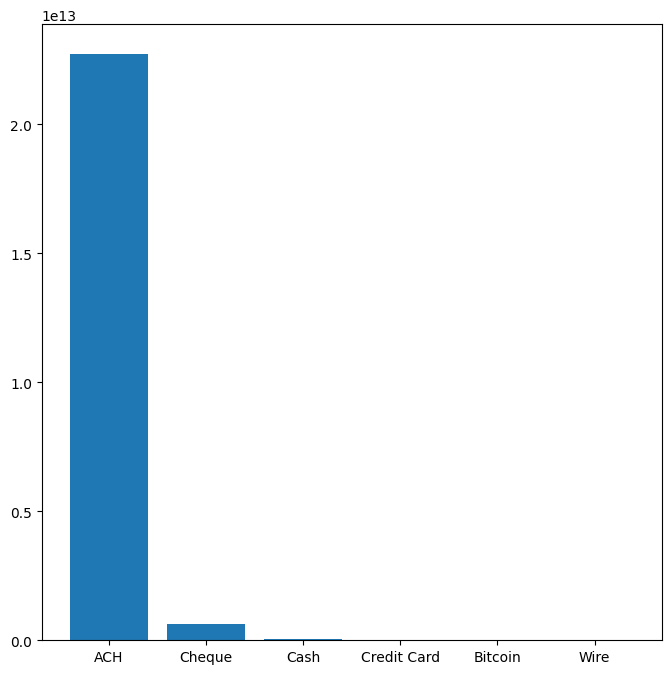

In [10]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/ibm_aml.db')
duckdb_to_arrow = con.query("""
  SELECT 
    ROUND(SUM(amount_paid), 2) as total_paid, 
    payment_format 
  FROM vw_is_laundering 
  GROUP BY payment_format 
  ORDER BY SUM(amount_paid) DESC;               
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.bar(x=polars_df["payment_format"], height=polars_df["total_paid"])
plt.show()

plt.show()

# close connection
con.close()

What's the most laundering currency? showing in pie chart.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

total_paid,payment_currency
f64,str
8.4865e12,"""Rupee"""
6.4202e12,"""Yen"""
4.5248e12,"""Ruble"""
1.2780e12,"""Yuan"""
7.4596e11,"""US Dollar"""
6.4494e11,"""Mexican Peso"""
4.9302e11,"""Euro"""
3.7528e11,"""Shekel"""
1.6231e11,"""Saudi Riyal"""


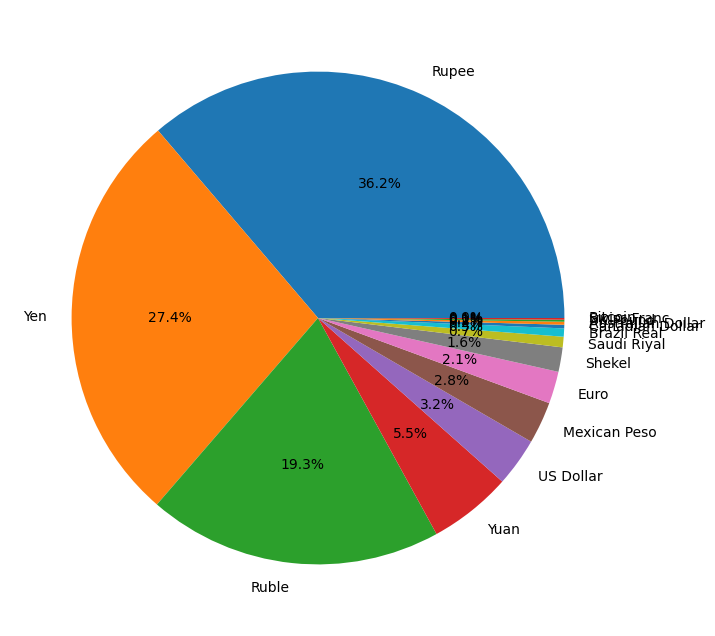

In [11]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/ibm_aml.db')
duckdb_to_arrow = con.query("""
SELECT ROUND(SUM(amount_paid), 2) as total_paid, payment_currency FROM vw_is_laundering GROUP BY payment_currency ORDER BY SUM(amount_paid) DESC;                  
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["total_paid"], labels = polars_df["payment_currency"], autopct='%1.1f%%')
plt.show()

con.close()

## Canada Open Data Status 

#### Open Data Canada - Government of Canada organizations to conduct an inventory of their open data holdings. All of the inventories we received have been consolidated into the chart below. Use the thumbs up to help prioritize the release of a dataset.
#### Total count of inventory

In [12]:
import duckdb

con = duckdb.connect('db/cdn_open_data.db')

total = con.query("""SELECT count(*) from inventory;""")
print(total)

con.close()

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│        11161 │
└──────────────┘



#### Released vs No Yet Released

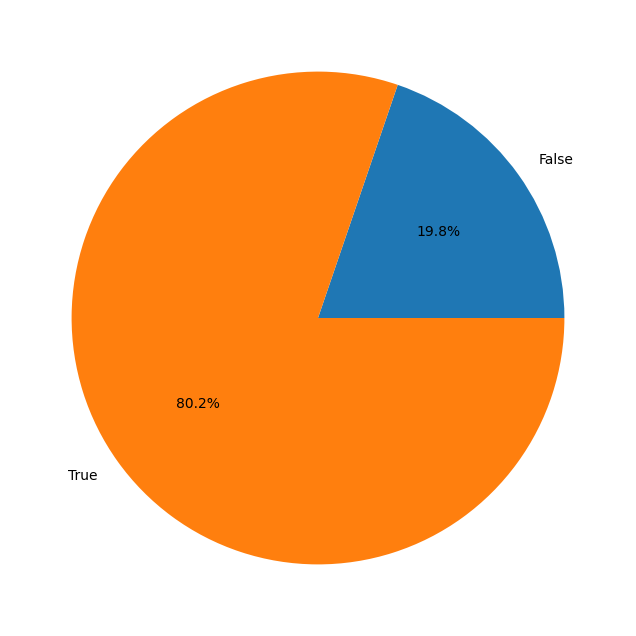

In [13]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query("""
SELECT count(*) - count(date_released) as 'count', CAST(false AS boolean) as released FROM inventory union select count(date_released), CAST(true AS boolean) as released from inventory;""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

# display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["count"], labels = polars_df["released"], autopct='%1.1f%%')
plt.show()

con.close()


### Released by Divison

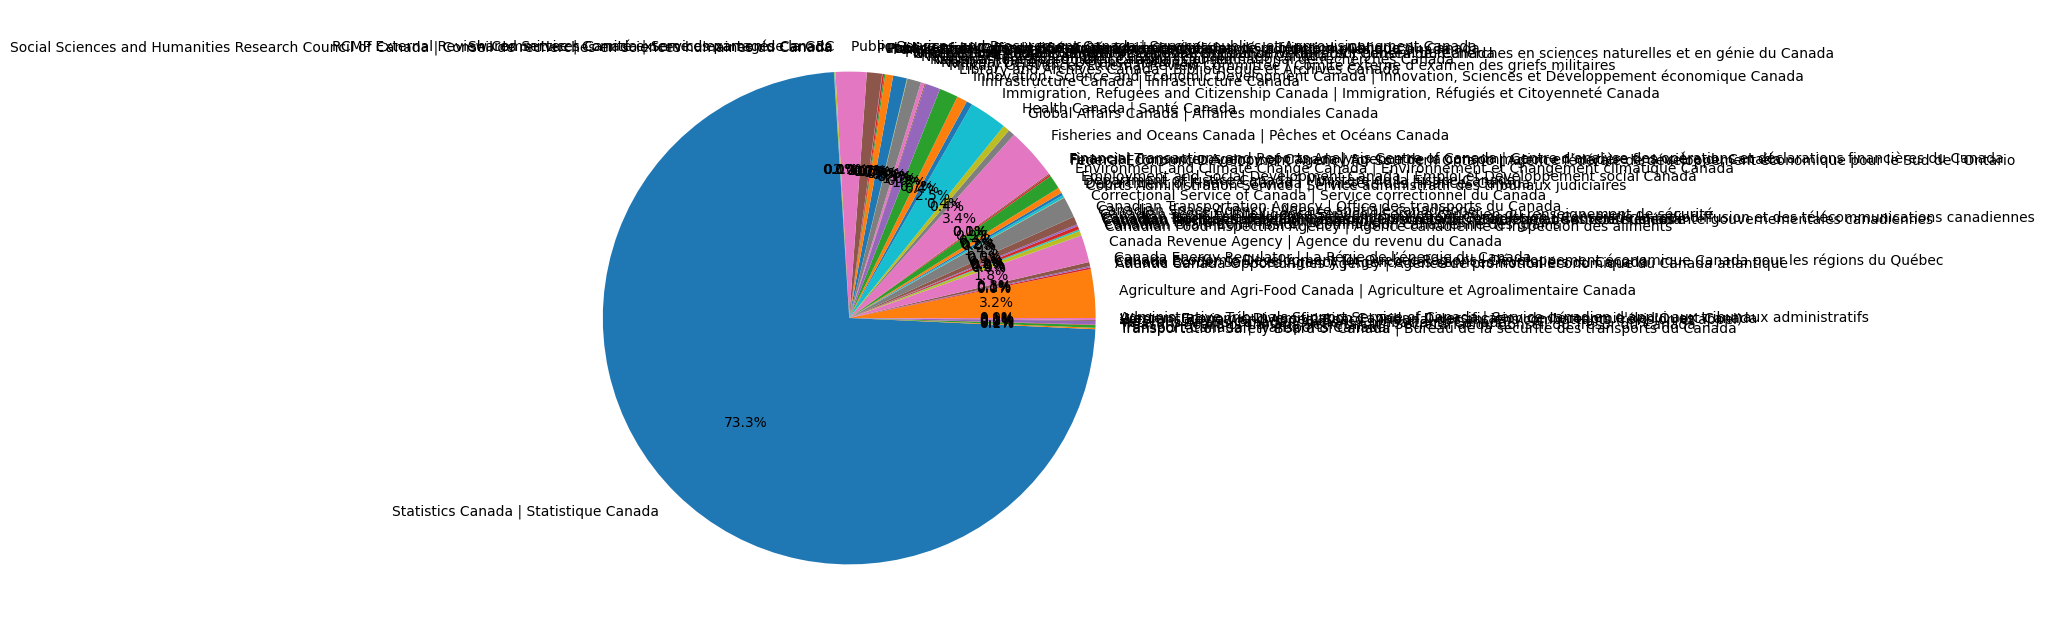

In [14]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt
# import ipywidgets as widgets

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query(
"""
    select owner_org_title, count(date_released) as released from inventory group by owner_org_title; 
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

# display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["released"], labels = polars_df["owner_org_title"], autopct='%1.1f%%')
plt.show()

# def say_my_name(name):
#     """
#     Print the current widget value in short sentence
#     """
#     print(f'My name is {name}')
     
# widgets.interact(say_my_name, name=polars_df["owner_org_title"]);

con.close()
